<a href="https://colab.research.google.com/github/halanay/IsletimSistemleriOdevi/blob/master/Garbage__classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN ALGORİTMASI
TrashNet Veri Seti



*   G211210061 - Aslı Döngez 2B

*   G221210385 - Melek Yakın 2B



Görüntü işleme, görüntüyü dijital forma dönüştürmenin ve üzerinde bazı işlemler gerçekleştirmenin bir yoludur. Bu durumda, giriş bir görüntüdür ve çıkış görüntü ile ilişkilendirilmiş bir görüntü veya özellikleri olabilir. Gün geçtikçe daha fazla kullanılan bu yöntem, mühendislik ve bilgisayar bilimlerinde yaygın olarak kullanılmaktadır. Günümüzdeki bilgisayarlar, gelişmiş teknikleri ve algoritmaları kullanarak, sayısal veri işlemenin yanı sıra görüntüleri otomatik olarak işleyebilir ve kategorize edebilirler. Fotoğraflarda doğal olarak oluşan desenleri öğrenen Derin Öğrenme ağı (CNN) tarafından yapılmaktadır.

Convolutional Neural Network (CNN), derin öğrenme alanında önemli bir yer edinmiş, görsel veri analizi ve sınıflandırma gibi görevlerde olağanüstü başarılar elde etmiş bir yapay sinir ağı mimarisidir. CNN'ler, biyolojik görsel sistemlerden ilham alarak, görüntü verilerini işlemek ve anlamak için geliştirilmişlerdir. Temelde, CNN'ler görüntü verilerinin özelliklerini tanımlamak ve çıkarmak için öğrenilebilir filtreler veya evrişim işlemleri uygularlar. Bu, girdi görüntüsünden yüksek seviyede anlamlı özelliklerin çıkarılmasını sağlar ve sınıflandırma, nesne tanıma, yüz tanıma ve diğer görsel tanıma görevlerinde etkili bir şekilde kullanılabilir. CNN'lerin başlıca özellikleri arasında evrişim katmanları, havuzlama katmanları ve tam bağlantılı katmanlar yer alır. Evrişim katmanları, görüntü üzerinde özellik haritalarını çıkarmak için bir dizi filtre uygular, havuzlama katmanları ise bu özellik haritalarını küçültür ve önemli bilgileri korur. Tam bağlantılı katmanlar, özellik haritalarını birbirine bağlayarak sınıflandırma veya tahmin yapmak için kullanılır. CNN'ler, derin öğrenme alanında bir dönüm noktası olarak kabul edilir ve birçok uygulama alanında geniş kullanımıyla öne çıkarlar.
(1)Derin Öğrenme Mimarilerinden Konvolüsyonel Sinir Ağları (CNN) Üzerinde Görüntü İşleme-Sınıflandırma Kabiliyetininin Arttırılmasına Yönelik Yapılan Çalışmaların İncelenmesi-Mustafa Tüfekçi1, Doç. Dr. Fatih Karpat 2
**(2)Derin Öğrenme Yöntemlerini Kullanarak Görüntülerin Analizi- Nina Aalami*1

**Evrişimli Sinir Ağları (CNN) ile Katı Atık Tespiti**

1.   İş Problemi (Business Problem)
2.   Veriyi Anlamak (Data Understanding)
3.   Veriyi Hazırlamak (Data Preparation)
4.   Modelleme (Modeling)
5.   Değerlendirme (Evaluation)



**1) İş Problemi (Business Problem)**

İş Problemi Nedir?


*   Problem: Atık yönetimi, çevre kirliliğini azaltmak ve geri dönüşüm oranlarını artırmak için önemli bir konudur. Ancak, atıkların el ile sınıflandırılması zaman alıcı ve hatalara açık bir süreçtir. Bu durum, geri dönüşüm tesislerindeki verimliliği azaltabilir ve maliyetleri artırabilir.
*   Çözüm: Yapay zeka kullanarak atıkların otomatik olarak sınıflandırılması, bu süreci otomatikleştirir ve optimize eder ve insan gücünün azaltılmasına olanak tanır.



**2)Veriyi Anlamak (Data Understanding)**


*   Veri Seti Hikayesi

Bu proje kapsamında kullanacağımız veri seti TrashNet isimli veri setidir. Stanford Üniversitesi öğrencileri tarafından hazırlanılmıştır.
Veri seti altı farklı sınıftan oluşmaktadır. Veri setinde Cam, Kağıt, Karton, Plastik, Metal ve Çöp olmak üzere toplamda 2527 adet görüntü bulunmaktadır.
Görüntülerin dağılımı:
* 501 cam
* 594 kağıt
* 403 karton
* 482 plastik
* 410 metal
* 137 çöp
Görüntüler, beyaz bir panoya yerleştirilerek ve güneş ışığı veya oda aydınlatması kullanılarak çekilmiştir. Görüntüler, 512 x 384 piksel boyutlarında ve 3 (RGB) kanallıdır.
* [Kaggle Adresi ](https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification)


2.1) Gerekli Kütüphanelerin Import Edilmesi

In [1]:
#veriyi okuma ve işleme adımında kullanılacak kütüphaneler
import cv2
import urllib
import itertools
import numpy as np
import pandas as pd
import seaborn as sns  #istatistiksel datayı görselleştirme
import random, os, glob
from imutils import paths
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from urllib.request import urlopen

#warningleri kapatmak için kullanılmaktadır
import warnings
warnings.filterwarnings('ignore')

#model değerlendirme için kullanılacak olan kütüpheneler
from sklearn.metrics import confusion_matrix, classification_report

#Model için kullanılacak kütüphaneler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, Embedding, multiply
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, Conv2DTranspose
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam


2.2) Veri Setinin Okunması

1. Google Colab Notebook ile Google Drive hesabının eşleştirilmesi.
2. Veri setinin Google Drive'a yüklenmesi ve adresinin notebook'a gösterilmesi
3. Veri setini okuyacak fonksiyonun tanımlanması





In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
#Drive'da bu veri setinde yer alan görüntülerin olduğu path bilgisinin tutulması
dir_path = '/content/drive/MyDrive/Garbage classification'

In [45]:
#Target size ve Label Etiket Değerlerinin Belirlenmesi
target_size = (224,224)

waste_labels = {'cardboard':0,'glass':1,'metal':2, 'paper':3, 'plastic':4, 'trash':5}


In [46]:
def load_datasets(path):
    """
    Görsellerin bulunduğu dizindeki görüntüyü okuyup etiketleri oluşturur
    """
    x = []
    labels = []

    # Gönderilen path'teki görüntüleri listeleyip sıralar
    image_paths = sorted(list(paths.list_images(path)))

    for image_path in image_paths:
        # Belirtilen path'teki görüntüler OpenCV kütüphanesiyle okunur.
        img = cv2.imread(image_path)

        # Okunan görüntüler başlangıçta belirlenen target_size'a göre yeniden boyutlandırılır.
        img = cv2.resize(img, target_size)

        # Boyutlandırılan görüntüler x listesine eklenir.
        x.append(img)

        # Her bir path '/' ifadesi ile ayrıldığında dönen listenin sondan ikinci elemanı label'ı temsil eder.
        label = image_path.split(os.path.sep)[-2]
        labels.append(waste_labels[label])

    # Veri seti rastgele bir şekilde karıştırılır.
    x, labels = shuffle(x, labels, random_state=42)

    print(f"X boyutu: {np.array(x).shape}")
    print(f"Label sınıf sayısı: {len(np.unique(labels))}, Gözlem sayısı: {len(labels)}")
    return x, labels

In [47]:
x, labels = load_datasets(dir_path)

X boyutu: (2530, 224, 224, 3)
Label sınıf sayısı: 6, Gözlem sayısı: 2530


In [37]:
# Görüntü boyutlarının tutulması
input_shape = (np.array(x[0]).shape[1], np.array(x[0]).shape[1], 3)
print(input_shape)

(224, 224, 3)


**3.3) Veri Setiden Örnekler Gösterilmesi**

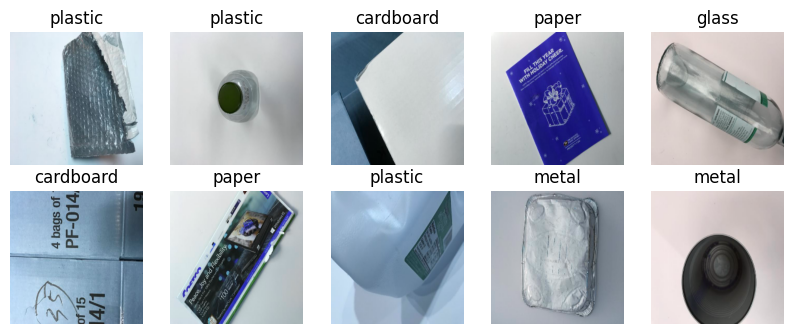

In [48]:
# Görüntü görselleştirme fonksiyonu
def visualize_img(image_batch, label_batch):
    """
    image_batch: görüntülere ait matris bilgilerini tutar
    label_batch: görüntünün ait olduğu sınıf bilgisini tutan liste
    """
    plt.figure(figsize=(10, 10))
    for n in range(10):
        ax = plt.subplot(5, 5, n+1)
        plt.imshow(image_batch[n])
        class_index = np.argmax(label_batch[n])
        class_name = list(waste_labels.keys())[class_index]
        plt.title(class_name)
        plt.axis('off')

visualize_img(x, to_categorical(labels, num_classes=6))


**3) Veriyi Hazırlamak (Data Preparation)**

In [49]:
# Train ve test veri üreteçlerinin tanımlanması
train = ImageDataGenerator(horizontal_flip=True,
                                     vertical_flip=True,
                                     validation_split=0.1,
                                     rescale=1/255,
                                     shear_range=0.1,
                                     zoom_range=0.1,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1)

test = ImageDataGenerator(rescale=1/255,
                                    validation_split=0.1)

In [50]:
train_generator = train.flow_from_directory(directory=dir_path,
                                            target_size=(target_size),
                                            class_mode='categorical',
                                            subset='training')

test_generator = test.flow_from_directory(directory=dir_path,
                                          target_size=(target_size),
                                          batch_size=251, # Bu sayı toplam test veri sayısına eşit olmalıdır
                                          class_mode='categorical',
                                          subset='validation')



Found 2279 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


**4)Modelleme (Modelling)**

4.1) Sıfırdan CNN Modeli Kurma
* Sequential
* Evrişim Katmanı (Convolution Layer, Conv2D)
* Havuzlama Katmanı (Pooling Layer)
* Aktivasyon Fonksiyonu Katmanı (Activation Layer)
* Flattening Katmanı
* Dense Katmanı
* Dropout Katmanı



In [11]:
# Modelin oluşturulması
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=input_shape, activation='relu'),
    MaxPooling2D(pool_size=2, strides=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=2, strides=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=2, strides=(2, 2)),
    Flatten(),
    Dense(units=64, activation='relu'),
    Dropout(rate=0.2),
    Dense(units=32, activation='relu'),
    Dropout(rate=0.2),
    Dense(units=6, activation='softmax')
])


4.2) Modelin Özeti

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 32)        0

<h1><center><ing src="https://drive.google.com/uc?
id=1WEV0j8pEmQ]tE19goRRoGvaQYRgTE7GX"

<h1><center><img src="https://drive.google.com/uc?
id=1WEV0j8pEmQltEi9goRRoGvaQYRgTE7GX" width="2000"></center></h1>

4.3) Optimizasyon ve Değerlendirme Metriklerinin Ayarlanmsı

In [13]:
# Modelin derlenmesi
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),"acc"])

# Callback fonksiyonlarının tanımlanması
callbacks = [EarlyStopping(monitor='val_loss', patience=50, verbose=1, mode="min"),
             ModelCheckpoint(filepath='mymodel.h5', monitor='val_loss', mode='min', save_best_only=True,
                             save_weights_only=False, verbose=1)]

4.4)Modelin Eğitilmesi

In [15]:
history= model.fit_generator(generator=train_generator,
                             epochs= 50,
                             validation_data=test_generator,
                             callbacks=callbacks,
                             workers=4,
                             steps_per_epoch=2276//32,
                             validation_steps=251//32)

Epoch 1/50
71/71 [==============================] - ETA: 0s - loss: 1.7376 - precision: 0.3673 - recall: 0.0080 - acc: 0.2487
Epoch 1: val_loss improved from inf to 1.57113, saving model to mymodel.h5
71/71 [==============================] - 313s 4s/step - loss: 1.7376 - precision: 0.3673 - recall: 0.0080 - acc: 0.2487 - val_loss: 1.5711 - val_precision: 1.0000 - val_recall: 0.0598 - val_acc: 0.3187
Epoch 2/50
71/71 [==============================] - ETA: 0s - loss: 1.5737 - precision: 0.7788 - recall: 0.0752 - acc: 0.3149
Epoch 2: val_loss improved from 1.57113 to 1.52315, saving model to mymodel.h5
71/71 [==============================] - 311s 4s/step - loss: 1.5737 - precision: 0.7788 - recall: 0.0752 - acc: 0.3149 - val_loss: 1.5231 - val_precision: 0.6389 - val_recall: 0.0916 - val_acc: 0.3347
Epoch 3/50
71/71 [==============================] - ETA: 0s - loss: 1.5450 - precision: 0.7292 - recall: 0.0934 - acc: 0.3577
Epoch 3: val_loss improved from 1.52315 to 1.46455, saving model

4.5) Accuracy ve Loss Grafikleri

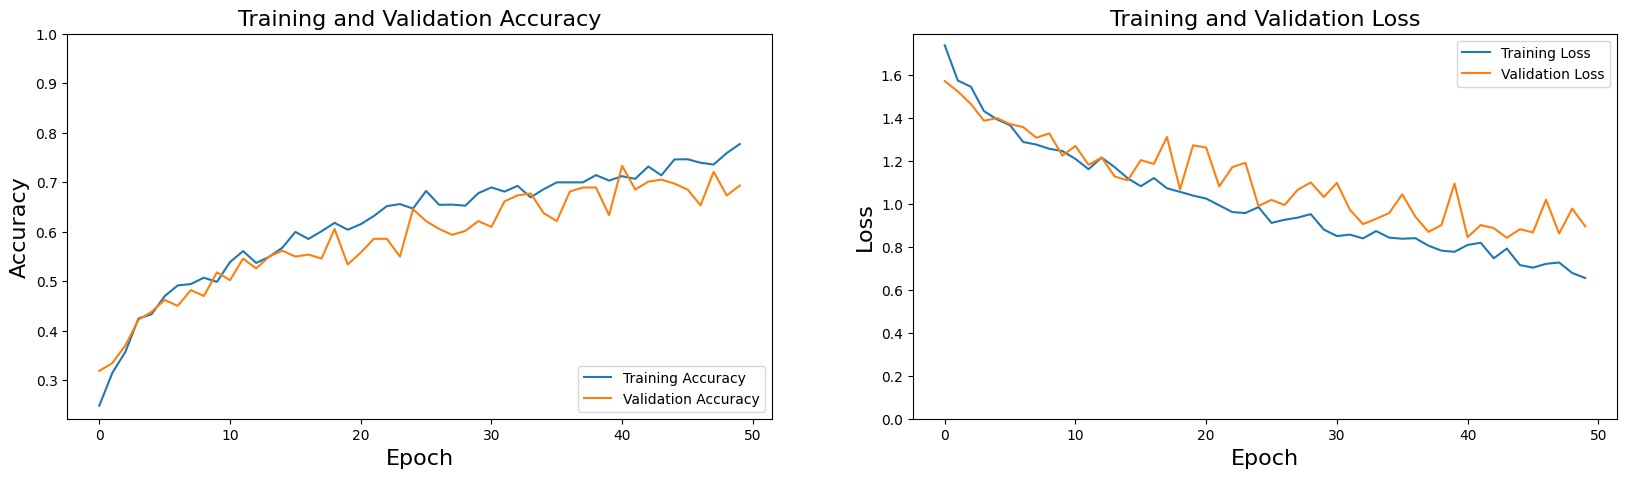

In [16]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy', fontsize=16)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title('Training and Validation Loss', fontsize=16)

plt.show()

**5) Değerlendirme(Evaluation)**

In [17]:
loss, precision, recall, acc = model. evaluate(test_generator, batch_size=32)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))
print("\nTest loss: %.1f%%" % (100.0 * loss))
print("\nTest precision: %.1f%%" % (100.0 * precision))
print("\nTest recall: %.1f%%" % (100.0 * recall) )

1/1 [==============================] - 11s 11s/step - loss: 0.8955 - precision: 0.7811 - recall: 0.6255 - acc: 0.6932

Test accuracy: 69.3%

Test loss: 89.5%

Test precision: 78.1%

Test recall: 62.5%


In [18]:
#Classification Report
x_test, y_test = test_generator.next()
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

8/8 [==============================] - 6s 699ms/step


In [19]:
target_names=list(waste_labels.keys())

In [20]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   cardboard       0.77      0.68      0.72        40
       glass       0.68      0.82      0.75        50
       metal       0.62      0.56      0.59        41
       paper       0.76      0.92      0.83        59
     plastic       0.61      0.48      0.53        48
       trash       0.60      0.46      0.52        13

    accuracy                           0.69       251
   macro avg       0.67      0.65      0.66       251
weighted avg       0.69      0.69      0.68       251



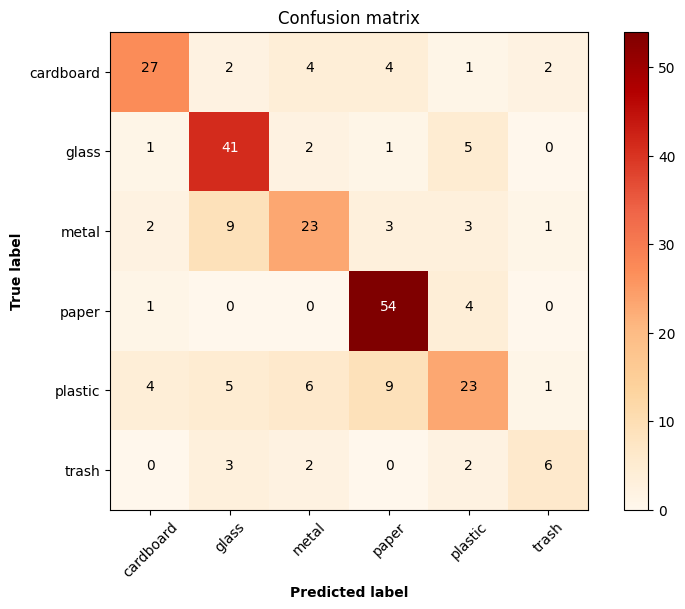

In [21]:
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting "normalize=true •
  """
  if normalize:
    cm=cm.astype('float') / cm. sum(axis=1) [:, np. newaxis]
  plt.figure(figsize=(8,6))
  plt. imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes,rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max ( ) / 2.

  for i, j in itertools.product(range (cm.shape[0]), range (cm.shape [1] )) :
    plt.text(j, i, format(cm[i,j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel ('True label', fontweight="bold")
  plt.xlabel('Predicted label', fontweight="bold")
plot_confusion_matrix(cm, waste_labels.keys(),
                      title='Confusion matrix',
                      cmap=plt.cm.OrRd)

**Modelin Kullanılması / Test Edilmesi**

1/1 [==============================] - 0s 38ms/step


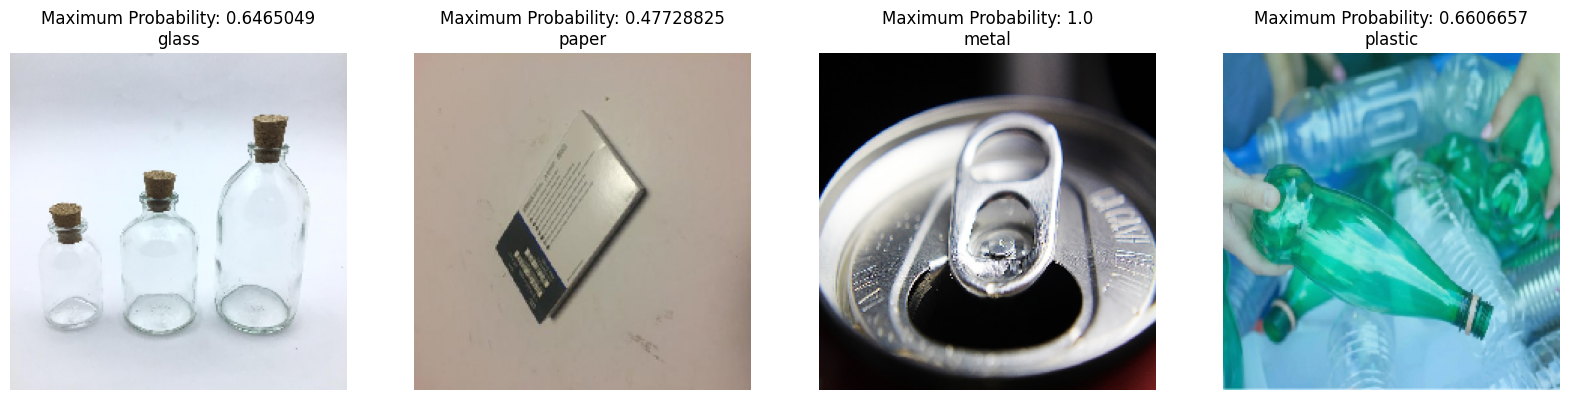

In [51]:
waste_labels = {0:'cardboard', 1:'glass', 2:'metal', 3:'paper', 4:'plastic', 5:'trash'}

def model_testing(path):
    img = image.load_img(path, target_size=(target_size))
    img = image.img_to_array(img, dtype=np.uint8)
    img = np.array(img)/255.0
    p = model.predict(img.reshape(1,224,224,3))
    predicted_class = np.argmax(p[0])

    return img, p, predicted_class

img1, p1, predicted_class1 = model_testing('/content/drive/MyDrive/Garbage classification/glass/cam1010.jpeg')
img2, p2, predicted_class2 = model_testing('/content/drive/MyDrive/Garbage classification/paper/paper593.jpg')
img3, p3, predicted_class3 = model_testing('/content/drive/MyDrive/Garbage classification/metal/metal1010.jpg')
img4, p4, predicted_class4 = model_testing('/content/drive/MyDrive/Garbage classification/plastic/plastik1010.jpg')

plt.figure(figsize=(20,60))

plt.subplot(141)
plt.axis('off')
plt.imshow(img1.squeeze())
plt.title("Maximum Probability: " + str(np.max(p1[0], axis=-1)) + "\n" + str(waste_labels[predicted_class1]))

plt.subplot(142)
plt.axis('off')
plt.imshow(img2.squeeze())
plt.title("Maximum Probability: " + str(np.max(p2[0], axis=-1)) + "\n" + str(waste_labels[predicted_class2]))

plt.subplot(143)
plt.axis('off')
plt.imshow(img3.squeeze())
plt.title("Maximum Probability: " + str(np.max(p3[0], axis=-1)) + "\n" + str(waste_labels[predicted_class3]))

plt.subplot(144)
plt.axis('off')
plt.imshow(img4.squeeze())
plt.title("Maximum Probability: " + str(np.max(p4[0], axis=-1)) + "\n" + str(waste_labels[predicted_class4]))

plt.show()

